Importing the dependencies

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [16]:
data = sklearn.datasets.load_boston()

c:\Program Files\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [45]:
pdata = pd.DataFrame(data.data, columns=data.feature_names)

In [46]:
pdata['price'] = data.target

In [48]:
pdata.shape

(506, 14)

In [22]:
#checking missing values

pdata.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
price    0
dtype: int64

In [23]:
pdata.describe

<bound method NDFrame.describe of            0     1      2    3      4      5     6       7    8      9    10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

     

UNDERSTANDING THE CORRELATION BETWEEN VARIOUS FEAUTURES IN THE DATASET

In [24]:
correlation = pdata.corr()

<AxesSubplot:>

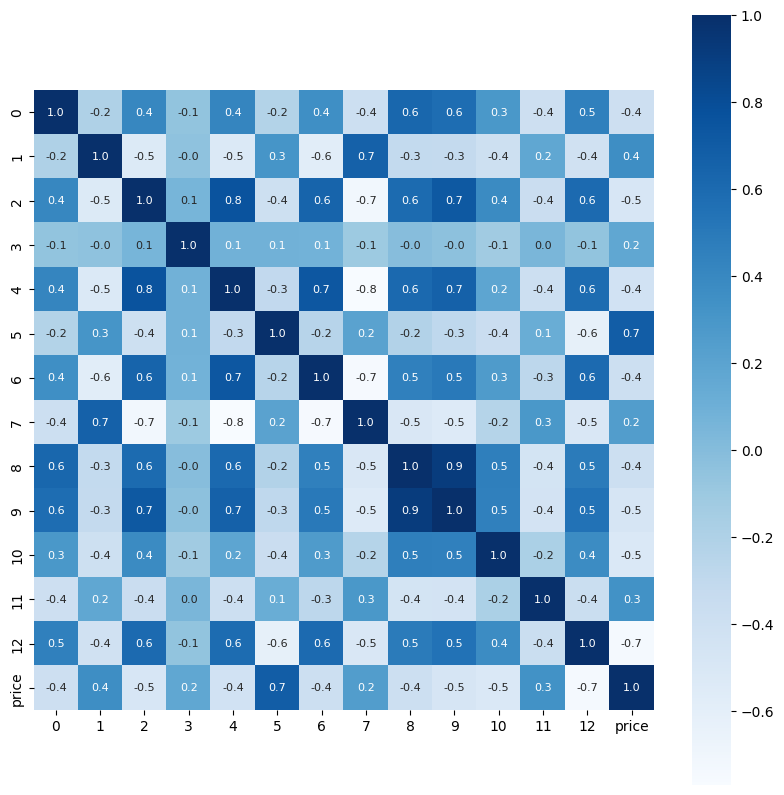

In [49]:
#constructing a heatmap to undertsand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [54]:
#splitting the data and the target

x=pdata.drop(['price'], axis=1 )
y = pdata['price']

#train test split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

MODEL TRAINING

XGBOOST REGRESSOR

In [55]:
model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

MODEL EVALUATION

In [65]:
prediction = model.predict(x_train)

In [66]:
#R squared error

score1 = metrics.r2_score(y_train, prediction)

#Mean absolute Error

score2 = metrics.mean_absolute_error(y_train, prediction)

In [67]:
print("R Squared Error : ",score1)
print("Mean Absolute Error : ",score2)

R Squared Error :  0.9999948236320982
Mean Absolute Error :  0.0145848437110976


VISUALIZING ACTUAL PRICES AND PREDICTED PRICES

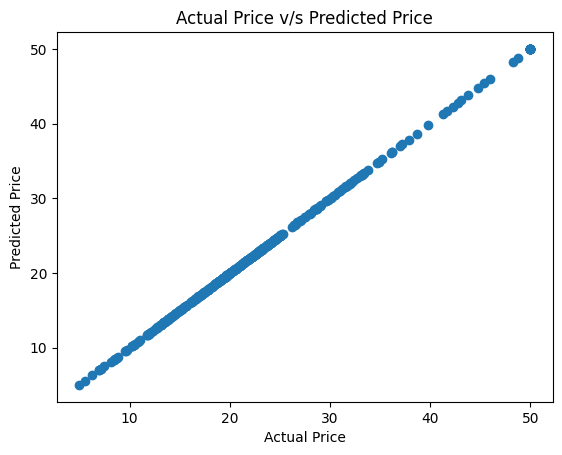

In [69]:
plt.scatter(y_train,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual Price v/s Predicted Price')
plt.show()

PREDICTION ON TEST DATA

In [59]:
prediction = model.predict(x_test)

In [60]:
#R squared error

score1 = metrics.r2_score(y_test, prediction)

#Mean absolute Error

score2 = metrics.mean_absolute_error(y_test, prediction)

In [61]:
print("R Squared Error : ",score1)
print("Mean Absolute Error : ",score2)

R Squared Error :  0.8711660369151691
Mean Absolute Error :  2.2834744154238233
